1. Import required libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

2. Read the data

In [5]:
df = pd.read_csv('./sample_data/owid-covid-data.csv')

3. Inspect the data


In [6]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


4. Check for missing values

In [7]:
df.isnull().sum()

iso_code                                        0
continent                                    9956
location                                        0
date                                            0
total_cases                                  3033
                                            ...  
human_development_index                     30073
excess_mortality_cumulative_absolute       160630
excess_mortality_cumulative                160630
excess_mortality                           160630
excess_mortality_cumulative_per_million    160630
Length: 67, dtype: int64

5. Handle missing values

In [8]:
df.fillna(df.mean(), inplace=True)

<ipython-input-8-bf934754a5b1>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(), inplace=True)


6. Convert date column to datetime

In [9]:
df['date'] = pd.to_datetime(df['date'])

7. Filter data

In [10]:
filtered_data = df[df['location'].isin(['United States', 'United Kingdom', 'India'])]

8. Group data

In [11]:
grouped_data = filtered_data.groupby(['location', 'date'])['new_cases'].sum().reset_index()

9. Feature engineering

In [12]:
df['active_cases'] = df['total_cases'] - df['total_deaths'] - df['people_fully_vaccinated']


10. Data normalization

In [13]:
min_gdp = df['gdp_per_capita'].min()
max_gdp = df['gdp_per_capita'].max()
df['gdp_per_capita_normalized'] = (df['gdp_per_capita'] - min_gdp) / (max_gdp - min_gdp)

11. Time series plot for new cases

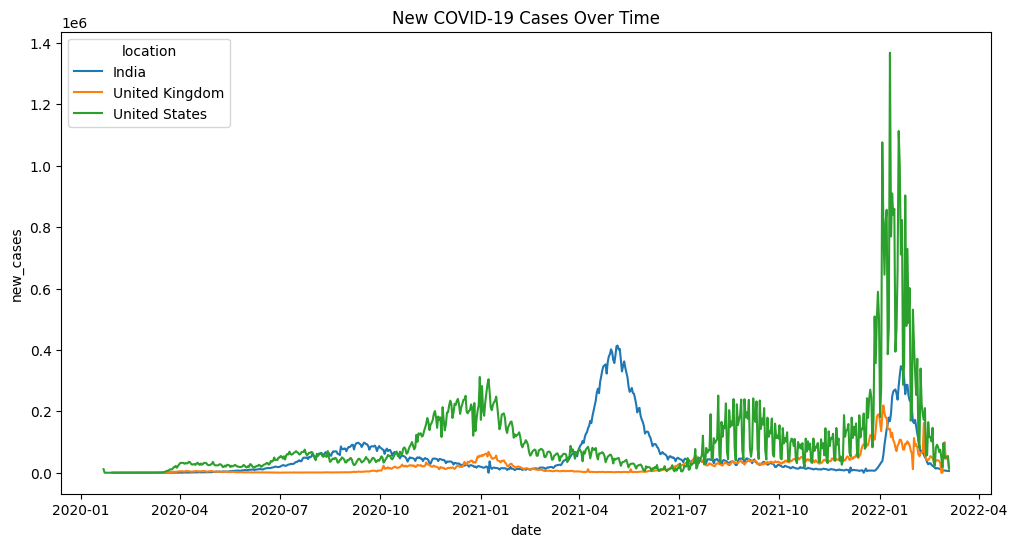

In [14]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=grouped_data, x='date', y='new_cases', hue='location')
plt.title('New COVID-19 Cases Over Time')
plt.show()

12. Bar plot for total vaccinations

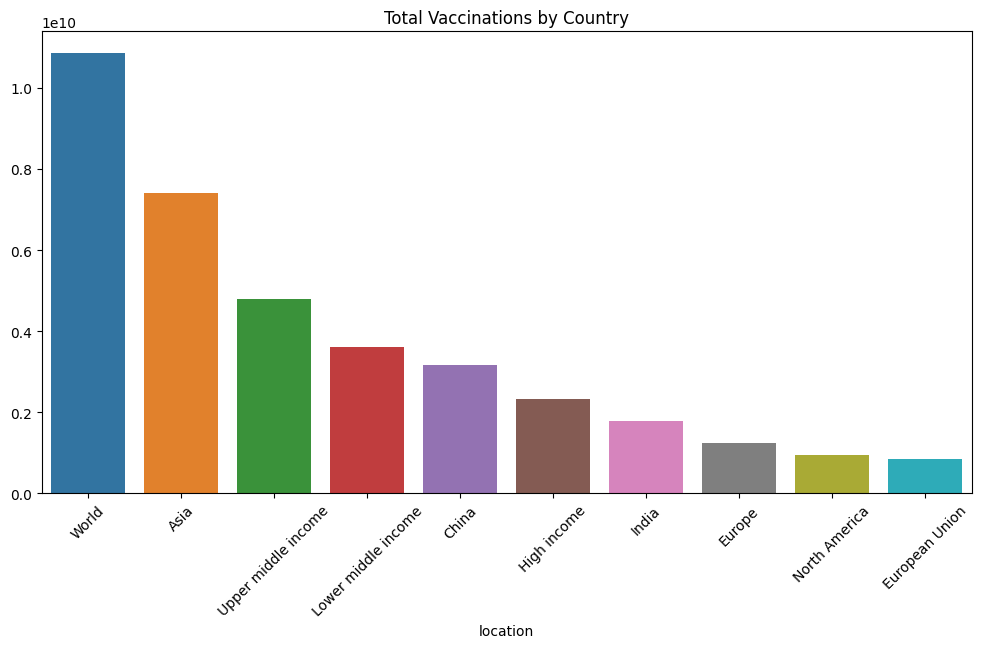

In [15]:
vaccination_data = df.groupby('location')['total_vaccinations'].max().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=vaccination_data.index, y=vaccination_data.values)
plt.title('Total Vaccinations by Country')
plt.xticks(rotation=45)
plt.show()

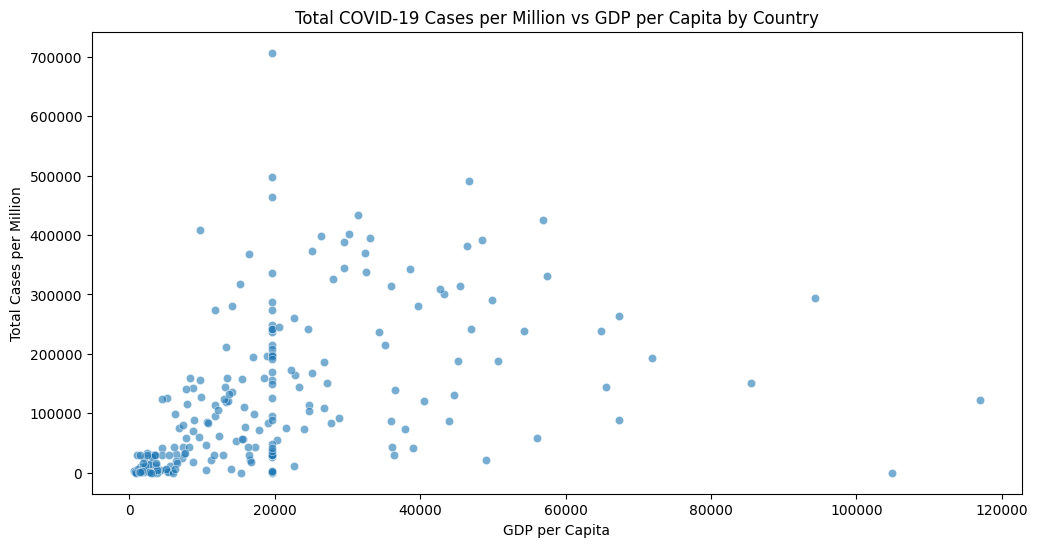

In [17]:
# Group data by location and calculate the total cases per million and GDP per capita
country_data = df.groupby('location')[['total_cases_per_million', 'gdp_per_capita']].max().reset_index()

# Create the scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=country_data, x='gdp_per_capita', y='total_cases_per_million', alpha=0.6)

plt.xlabel('GDP per Capita')
plt.ylabel('Total Cases per Million')
plt.title('Total COVID-19 Cases per Million vs GDP per Capita by Country')
plt.show()

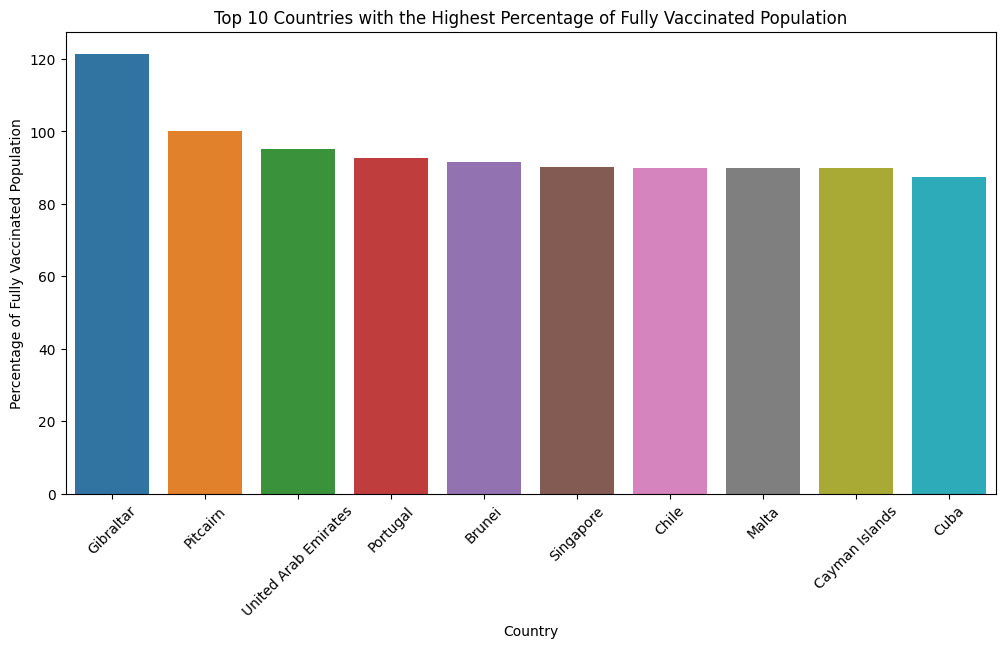

In [21]:
# Group data by location and calculate the percentage of people fully vaccinated
vaccination_percentage = df.groupby('location')['people_fully_vaccinated_per_hundred'].max().sort_values(ascending=False).head(10)

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=vaccination_percentage.index, y=vaccination_percentage.values)

plt.xlabel('Country')
plt.ylabel('Percentage of Fully Vaccinated Population')
plt.title('Top 10 Countries with the Highest Percentage of Fully Vaccinated Population')
plt.xticks(rotation=45)
plt.show()

In [22]:
top_10_countries = vaccination_percentage.index.tolist()
fully_vaccinated_numbers = df[df['location'].isin(top_10_countries)].groupby('location')['people_fully_vaccinated'].max()

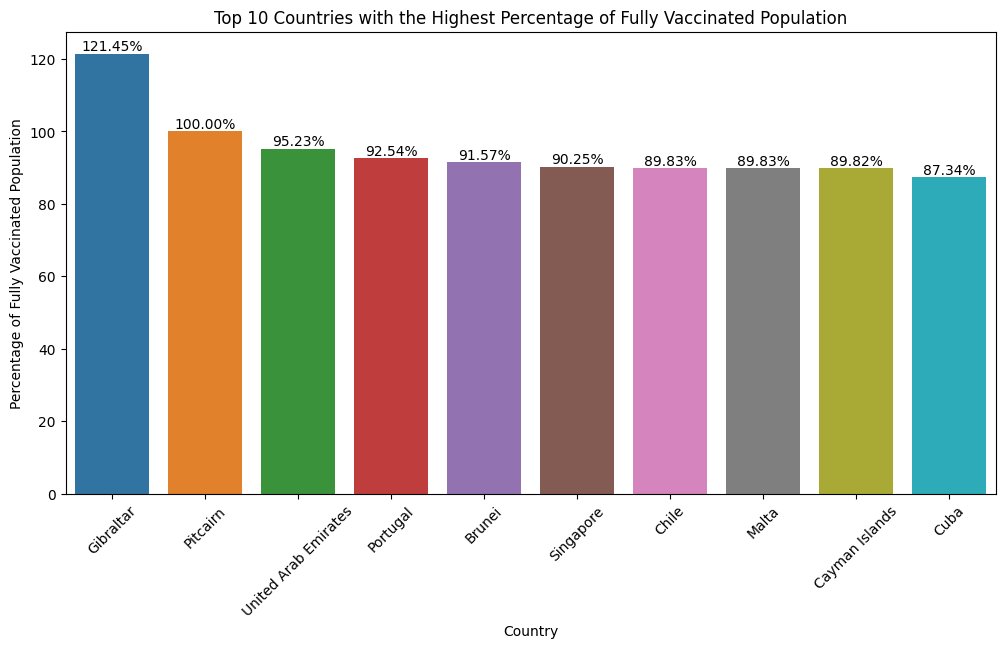

In [25]:
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x=vaccination_percentage.index, y=vaccination_percentage.values)

plt.xlabel('Country')
plt.ylabel('Percentage of Fully Vaccinated Population')
plt.title('Top 10 Countries with the Highest Percentage of Fully Vaccinated Population')
plt.xticks(rotation=45)

# Annotate the bars with percentages
for i, pct in enumerate(vaccination_percentage.values):
    barplot.annotate(f"{pct:.2f}%", (i, pct), ha='center', va='bottom', fontsize=10)

plt.show()

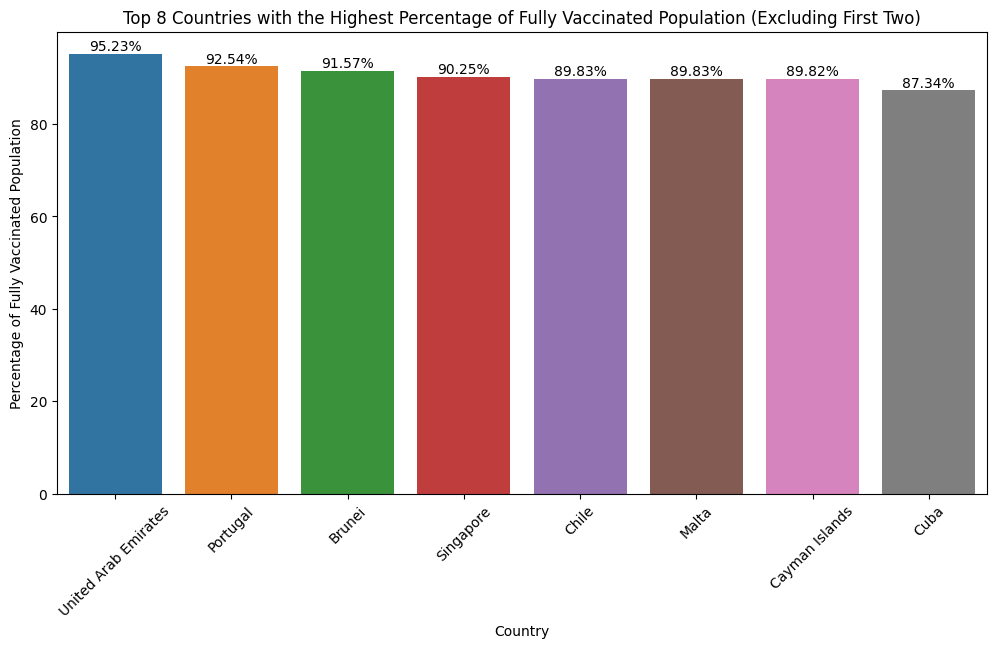

In [26]:
# Get the top 8 countries excluding the first two
vaccination_percentage_top8 = vaccination_percentage[2:]

# Create the bar plot
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x=vaccination_percentage_top8.index, y=vaccination_percentage_top8.values)

plt.xlabel('Country')
plt.ylabel('Percentage of Fully Vaccinated Population')
plt.title('Top 8 Countries with the Highest Percentage of Fully Vaccinated Population (Excluding First Two)')
plt.xticks(rotation=45)

# Annotate the bars with percentages
for i, pct in enumerate(vaccination_percentage_top8.values):
    barplot.annotate(f"{pct:.2f}%", (i, pct), ha='center', va='bottom', fontsize=10)

plt.show()